# Lab 3
**linear regration:Diabetes_data**

In [191]:
from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  


**load data from dataset**

In [172]:
from sklearn import datasets
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [173]:
diabetes_X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [174]:
diabetes_X.shape

(442, 10)

In [175]:
diabetes_y.shape

(442,)

** Arranged data **

In [176]:
diabetes_X = pd.DataFrame(diabetes_X)
diabetes_X.columns = ["age", "sex", "bmi", "abp", "s1_tc", "s2_ldl", "s3_hdl","s4_tch","s5_ltg","s6_glu"]
diabetes_X

,age,sex,bmi,abp,s1_tc,s2_ldl,s3_hdl,s4_tch,s5_ltg,s6_glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [177]:
diabetes_y=pd.DataFrame(diabetes_y)
diabetes_y.columns=["dis_prog"]
diabetes_y

,dis_prog
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


# joined the dataframe into one dataframe

In [178]:
diabetes=pd.concat([diabetes_X,diabetes_y],axis=1, join="inner")
diabetes

,age,sex,bmi,abp,s1_tc,s2_ldl,s3_hdl,s4_tch,s5_ltg,s6_glu,dis_prog
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


## correalation of data using heatmap & boxplot

<Axes: >

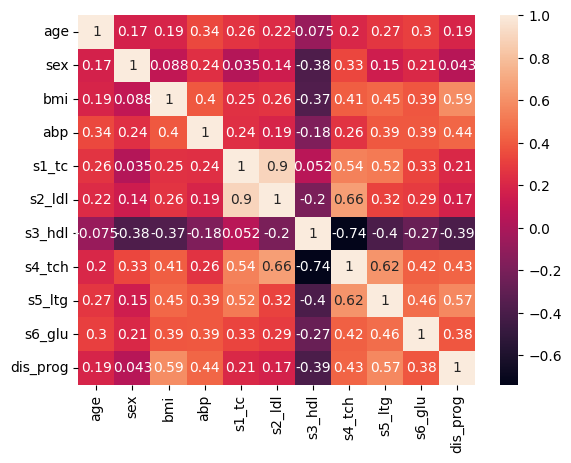

In [179]:
sns.heatmap(diabetes.corr(method="pearson"), annot=True)

<Axes: >

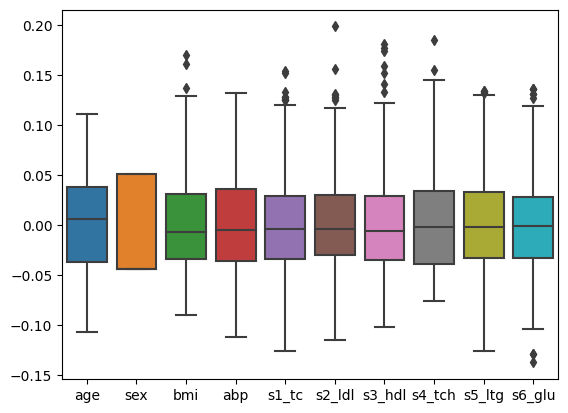

In [180]:
sns.boxplot(diabetes.iloc[:,:-1])

## visualizing the independent data with target data

<Axes: xlabel='bmi', ylabel='dis_prog'>

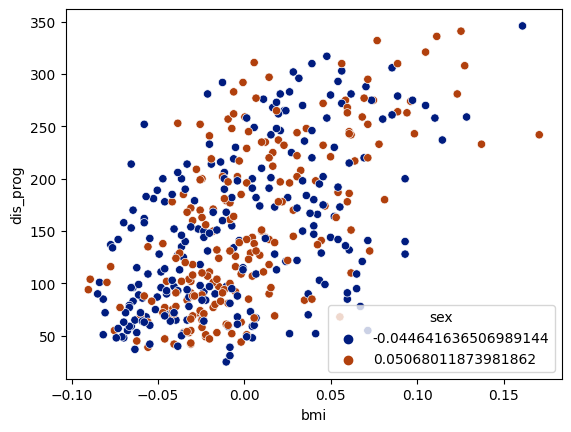

In [181]:
sns.scatterplot(data = diabetes, x = "bmi", y = "dis_prog", hue = "sex", palette= "dark")


# Model Development - Univariate Linear Regression Model Building
# Creating the Linear Regression Model between bmi and dis_prog

In [182]:
x=np.array(diabetes["bmi"]).reshape(-1,1)
y=np.array(diabetes["dis_prog"])



In [183]:
X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.2,random_state=123)

In [184]:
lr=LinearRegression()
lr
lr.fit(X_train,y_train)

LinearRegression()

# finding coefficiancy and intercept of data

In [185]:
m_co=lr.coef_
intercept=lr.intercept_
print("coefficiancy of model",m_co)
print("intercept of model",intercept)


coefficiancy of model [914.80793327]
intercept of model 152.4041464339237


In [186]:
y_pred=lr.predict(X_test)
y_pred

array([150.6708545 , 135.88098896, 188.13851386, 185.18054075,
       129.96504275, 148.69887243, 254.19991326, 125.03508757,
       168.41869314, 106.30125789, 124.04909653, 146.72689036,
       169.40468418, 183.20855868, 145.74089932, 135.88098896,
       111.23121307, 158.55878279, 170.39067522, 223.63419115,
       137.85297104, 220.67621804, 147.71288139, 101.37130271,
       124.04909653, 180.25058557, 144.75490829, 144.75490829,
       131.93702482, 144.75490829, 136.86698   , 207.85833457,
       188.13851386, 200.95639732, 173.34864832, 131.93702482,
       122.07711446,  81.651482  , 185.18054075, 110.24522203,
       169.40468418,  91.51139235, 115.17517721, 142.78292621,
       115.17517721, 181.23657661,  90.52540132, 114.18918618,
       137.85297104, 202.9283794 ,  88.55341925, 166.44671107,
       237.43806565, 207.85833457, 117.14715928, 154.61481864,
       257.15788636, 157.57279175, 140.81094414, 213.77428079,
       175.32063039, 117.14715928, 248.28396704, 211.80

In [187]:
y_pred_df = pd.DataFrame(y_pred)
y_test_df = pd.DataFrame(y_test)
y_comp = pd.concat([y_test_df,y_pred_df], axis = 1, join="inner")
y_comp.columns = ["y_test_df", "y_pred_df"]
y_comp

,y_test_df,y_pred_df
0,185.0,150.670855
1,150.0,135.880989
2,246.0,188.138514
3,184.0,185.180541
4,110.0,129.965043
...,...,...
84,258.0,253.213922
85,235.0,163.488738
86,173.0,168.418693
87,59.0,92.497383


 # step 7- Presenting the solution - Model Results Interpretation

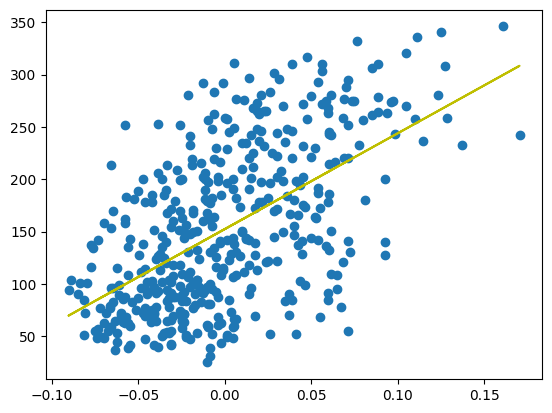

In [188]:
plt.scatter(x,y)
plt.plot(x,m_co * x +intercept , c = "y")

# ploting between actual vs predicting line

Text(0, 0.5, 'dis_prog')

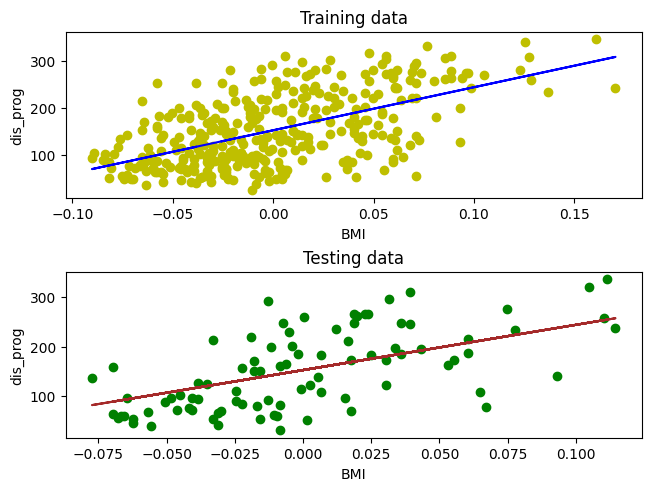

In [193]:

fig, axs = plt.subplots(2, 1, layout='constrained')
axs[0].scatter(x = X_train, y = y_train, c = "y")
axs[0].plot(X_train, m_co * X_train + intercept, c = "b")
axs[0].set_title('Training data')
axs[0].set_xlabel('BMI')
axs[0].set_ylabel('dis_prog')
axs[1].scatter(x = X_test, y = y_test, c = "g")
axs[1].plot(X_test, m_co * X_test +intercept, c = "brown")
axs[1].set_title("Testing data")
axs[1].set_xlabel('BMI')
axs[1].set_ylabel('dis_prog')


## finding the lost function using some methods

In [194]:
mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean squared error: ' , mse)

# The mean absolute error
print("Mean absolue error: ",metrics.mean_absolute_error(y_test, y_pred))

# Accuracy of the model
print("R-Squared of the model: ",lr.score(x,y))

Mean squared error:  3878.0975305864317
Mean absolue error:  51.45710293289439
R-Squared of the model:  0.3434539290309564


In this data we cannot find the accurate result as we cannot defind diabeties from one feature because every feature matters to find accurate result.